<center> <img src=images/hh.ru_logo.png alt="drawing" style="width:800px;">

# <center> Проект: Анализ резюме из HeadHunter

## Этапы работы над проектом 

[1. Базовый анализ структуры данных](#1.-Базовый-анализ-структуры-данных)  
[2. Преобразование данных](#2.-Преобразование-данных)  
[3. Разведывательный анализ - EDA](#3.-Разведывательный-анали---EDA)  
[4. Очистка данных](#4.-Очистка-данных)  
[5. Заключение](#5.-Заключение)
 







In [1]:
# imports 
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


# some settings and constants
%matplotlib inline
# remove the limit on the number of displayed columns
pd.set_option('display.max_columns', None)

HH_PATH = 'data/hh_db.csv'
RATES_PATH = 'data/ExchangeRates.csv'

## 1. Базовый анализ структуры данных  
[❎ **К ОГЛАВЛЕНИЮ**](#Этапы-работы-над-проектом)

In [2]:
# 1. Прочитайте данные с помощью библиотеки Pandas
cv_df = pd.read_csv(HH_PATH, sep=';')

# 2. Выведем несколько первых (последних) строк таблицы 
# и ознакомимся с признаками и их структурой.
display(cv_df.head(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


Некоторые признаки имеют сложную структуру, требующие предварительной обработки. К таким признакам можно отнести следующие признаки:  
- Пол, возраст  
- Город, переезд, командировки  
- Занятость	 
- График  
- Опыт работы  
- и другие.

In [3]:
# 3. Выведем основную информацию о числе непустых значений в столбцах и их типах в таблице.
cv_df.info()
print()
# 3.1 Расчитаем долю пропущенных значений
print("Доля пропущенных значений:")
empty_info = cv_df.isnull().mean() * 100
display(empty_info[empty_info>0].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64

Из сводки по данным видно, что часть признаков имеет пропуски в данных, а именно:  
- признак `Опыт работы** имеет примерно 0.37% пропусков
- признаки **Последнее/нынешнее место работы** и **Последняя/нынешняя должность** имеют не значительное кол-во пропусков

In [4]:
# 4 Выведем основную статистическую информацию о столбцах.
display(cv_df.describe(include=['object']))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


Основные статистики пока малоинформативны, так как все признаки, в том числе и явно числовые, пока имеют строковый формат данных, но даже из этого можно сделать несколько выводов:  
- Больше всего ищут работу на должность Системный администратор  
- Самый частый уровень ЗП 50 тыс. руб.  
- Чаще ищут работу на полный день и на полную занятость  
- Большинство соискателей не указывают информацию по наличию у него авто



Наши данные пока «сырые»: признаки представлены в неудобном для анализа и очистки формате.

Например, столбец «Пол/возраст» содержит информацию и о поле, и о возрасте, и о дате рождения.  
Желаемая заработная плата «ЗП» представлена в виде текста с указанием валюты, в которой она исчисляется, и так далее…

Всё это не позволяет нам визуально оценить зависимости в данных и сделать визуализацию, например:  
- гистограмму распределения зарплаты и возраста  
- столбчатую диаграмму зарплаты по уровню образования  
- и многое другое.  

Более того, мы не можем в таком виде заполнить пропущенные значения числовыми константами или найти выбросы.  
Иными словами, нам необходимо преобразовать данные, что позволит грамотно работать с ними. Именно этим мы сейчас и займемся.

## 2. Преобразование данных  
[❎ **К ОГЛАВЛЕНИЮ**](#Этапы-работы-над-проектом)

### 1. признак «Образование и ВУЗ»  
Его текущий формат — это: <Уровень образования год выпуска ВУЗ специальность...>.  
Например:  
- Высшее образование 2016 Московский авиационный институт (Национальный исследовательский университет)  
- Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота  


Пусть в рамках учебноо проекта нас будет интересовать только уровень образования.  
Причём, для простоты мы будем считать, что соискатель указывает свой максимальный уровень образования в первых трёх словах столбца «Образование и ВУЗ».

Создадим с помощью функции-преобразования новый признак «Образование», который должен иметь четыре категории:  
- «высшее»,  
- «неоконченное высшее»,  
- «среднее специальное»,  
- «среднее».

После выполнения преобразования и ответа на контрольные вопросы удалим признак «Образование и ВУЗ».

In [5]:
# Создадим список для удаляемых признаков
delete_cols = []

def education_category(s: str) -> str:
    """
    Выделяет из строки и возвращает один из типов образования: 
      - «высшее», 
      - «неоконченное высшее»,
      - «среднее специальное»,
      - «среднее»
    По легенде уровень образования указан в первых трёх словах переданной строки.
    Args:
        s (str): переданное значение, строка с информацией об образовании
        
    Returns:
        str: строка с типом образования
    """
    # приведем к нижнему регистру и удалим возможные пробельные символы с обоих сторон
    s = s.lower().strip()
    #  возьмем первые 3 слова
    edu_splitted = s.split(' ')[:3]
    
    if 'неоконченное' in edu_splitted:
        return 'неоконченное высшее'
    elif 'высшее' in edu_splitted:
        return 'высшее'
    elif 'специальное' in edu_splitted:
        return 'среднее специальное'
    elif 'среднее' in edu_splitted:
        return 'среднее'
   
 
# создадим новый признак Образование 
cv_df['Образование'] = cv_df['Образование и ВУЗ'].apply(education_category)

# Вопрос: Сколько соискателей имеет средний уровень образования (школьное образование)?
counted_categories = cv_df['Образование'].value_counts()
# Ответ: 559
print(f"средний уровень образования (школьное образование) имеет {counted_categories['среднее']} соискателей")

# добавим исходный признак "Образование и ВУЗ" в удаляемые
delete_cols.append('Образование и ВУЗ')

средний уровень образования (школьное образование) имеет 559 соискателей


### 2. признак «Пол, возраст»

Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

In [6]:
cv_df['Пол'] = cv_df['Пол, возраст'].apply(lambda s: s.split(' , ')[0][0].upper())
cv_df['Возраст'] = cv_df['Пол, возраст'].apply(lambda s: s.split(' , ')[1].split()[0]).astype('uint8')

# Вопрос: Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
gender_resumes_percentage = np.round(cv_df['Пол'].value_counts(normalize=True) * 100, 2)
print(f"Доля женских резюме {gender_resumes_percentage['Ж']}%")

# добавим признак 'Пол, возраст' в удаляемые
delete_cols.append('Пол, возраст')

Доля женских резюме 19.07%


### 3. признак «Опыт работы»  
Его текущий формат: <Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах,  
и занести информацию в новый признак «Опыт работы (месяц)».

Для начала обсудим условия решения задачи:  
1. Во-первых, в данном признаке есть пропуски. Условимся, что, если мы встречаем пропуск, оставляем его без изменений и вернем «NaN».  
2. Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значение «Не указано». Их тоже обозначим как «NaN»  
3. В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях).  
4. В-четвёртых, у нас есть проблема: опыт работы может быть представлен только в годах или только в месяцах. Например, можно встретить следующие варианты:
    - Опыт работы 3 года 2 месяца
    - Опыт работы 4 года
    - Опыт работы 11 месяцев

В результате преобразования мы получим столбец, содержащий информацию о том, сколько месяцев проработал соискатель.

Выполним преобразование без использования модуля re (условие по проекту) и удалим столбец «Опыт работы» из таблицы.

In [7]:
def get_experience(arg: str) -> int:
    """
    Выделяет из строки опыт в месяцах.
    По легенде переданное строковое значение имеет формат:
    <Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>
    Args:
        arg (str): переданное значение, строка, содержит информацию о 'Образование и ВУЗ'
        
    Returns:
        int: трудовой опыт в месяцах. Если строка s пустая либо имеет 
        значение 'Не указано', то возвращается None.
    """
    # отработаем крайние случаи 
    if arg is np.nan or arg == 'Не указано':
        return None
    
    # приведем строку к нижнему регистру и
    # удалим не нужную информацию вначале строки
    arg = arg.lower()\
             .replace('опыт работы ', '')
    
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    years = 0
    months = 0
    
    arg_splitted = arg.split(' ')[:5]
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
        continue

    return years*12 + months
      
 
# создадим новый признак Опыт работы (месяц)
cv_df['Опыт работы (месяц)'] = cv_df['Опыт работы'].apply(get_experience)

# добавим признак 'Опыт работы' в удаляемые
delete_cols.append('Опыт работы')

# Вопрос: Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print(f"Медианный опыт работы (в месяцах) равен {cv_df['Опыт работы (месяц)'].median()} месяцев")

Медианный опыт работы (в месяцах) равен 100.0 месяцев


### 3. признак «Город, переезд, командировки»  
Информация в нём представлена в следующем виде: <Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>.

В скобках указаны необязательные параметры строки.  
Например, можно встретить следующие варианты:  
- Москва , не готов к переезду , готов к командировкам
- Москва , м. Беломорская , не готов к переезду, не готов к командировкам
- Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам


Создадим отдельные признаки:  
- «Город»,  
- «Готовность к переезду»,  
- «Готовность к командировкам».  

При этом важно учесть:  
Признак «Город» может содержать только четыре категории:  
- «Москва»,  
- «Санкт-Петербург»,  
- «город-миллионник» - список входящих городов представлен ниже,  
- «другие» - все остальные города.

Города-миллионники: ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']  

Информация о метро, рядом с которым проживает соискатель, нас не интересует.  

Признак «Готовность к переезду» должен иметь два возможных варианта: «True» или «False».  
При этом возможны несколько вариантов описания готовности к переезду в признаке «Город, переезд, командировки». Например:  
- … , готов к переезду , …  
- … , не готова к переезду , …  
- … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)  
- … , хочу переехать (США) , …  

Условимся, что нас интересует только сам факт возможности/желания переезда.  

Признак «Готовность к командировкам» должен иметь два возможных варианта: «True» или «False».  
При этом возможны несколько вариантов описания готовности к командировкам в признаке «Город, переезд, командировки». Например:  
- … , готов к командировкам , …  
- … , готова к редким командировкам , …  
- … , не готов к командировкам , …  

Условимся, что нас интересует только сам факт готовности к командировке.

Ещё один важный момент: при выгрузке данных у некоторых соискателей «потерялась» информация о готовности к командировкам.  
Условимся, что по умолчанию будем считать, что такие соискатели «не готовы к командировк».  

Выполним преобразования и удалим столбец «Город, переезд, командировки» из таблицы. 

In [8]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
capital_cities = ['Москва', 'Санкт-Петербург']

# иницализируем новые признаки
for feature in 'Город|Готовность к переезду|Готовность к командировкам'.split('|'):
    cv_df[feature] = np.nan


def fill_city_and_trip_info(row: pd.Series) -> pd.Series:
    """
    Функция заполняет три признака 'Город', 'Готовность к переезду', 'Готовность к командировкам',
    информацией из исходного признака 'Город, переезд, командировки'
    Args:
        row (pd.Series): объект типа pd.Series включающая вышеуказанные признаки
        
    Returns:
        row (pd.Series): объект типа pd.Series с заполненными значениями новых признаков
    """
    data = row['Город, переезд, командировки']
    data_splitted = [s.strip() for s in data.split(' , ')]

    # определим Город
    city = data_splitted[0]
    if city in capital_cities:
        city_res = city
    elif city in million_cities:
        city_res  = 'город-миллионник'
    else:
        city_res = 'другие'
    row['Город'] = city_res
    
    # определим Готовность к переезду 
    relocate_info = data_splitted[2] if data_splitted[1][:2] == 'м.' else data_splitted[1]
    row['Готовность к переезду'] = relocate_info[:2] != 'не'
    
    # определим Готовность к командировкам
    # обработаем крайний случай, когда информации о командировках нет
    if (data_splitted[1][:2] == 'м.' and len(data_splitted) < 4) |\
       (data_splitted[1][:2] != 'м.' and len(data_splitted) < 3):
            moving_res = False
    else:
        moving_info = data_splitted[3] if data_splitted[1][:2] == 'м.' else data_splitted[2]
        moving_res = moving_info[:2] != 'не'
    row['Готовность к командировкам'] = moving_res
    
    return row
    
    
# применим функцию для заполнения новых признаков
cv_df = cv_df.apply(fill_city_and_trip_info, axis=1)

# Вопрос 1: Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
residents_of_petersburg = round(cv_df['Город'].value_counts(normalize=True) * 100)['Санкт-Петербург']
print(f"В Санкт-Петербурге живут {residents_of_petersburg} % соискателей")

# # Вопрос 2: Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
total_counts = cv_df.shape[0]
mask = (cv_df['Готовность к переезду']) & (cv_df['Готовность к командировкам'])
move_and_trip_counts = cv_df[mask].shape[0]
ready_to_both_actions = round(move_and_trip_counts/total_counts * 100)
print(f"Одновременно и к переездам, и к командировкам готовы {ready_to_both_actions}% соискателей")

# добавим признак 'Город, переезд, командировки' в удаляемые
delete_cols.append('Город, переезд, командировки')

В Санкт-Петербурге живут 11.0 % соискателей
Одновременно и к переездам, и к командировкам готовы 32% соискателей


### 4. признаки «Занятость» и «График»

Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтёрство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удалённая работа, вахтовый метод).

На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
- полная занятость, частичная занятость;  
- частичная занятость, проектная работа, волонтёрство;  
- полный день, удалённая работа;  
- вахтовый метод, гибкий график, удалённая работа, полная занятость.  
Такой вариант признаков имеет множество различных комбинаций, а значит, множество уникальных значений, что мешает анализу. Нужно это исправить!

Создадим булевы признаки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится «True», иначе — «False».   
Такой метод преобразования категориальных признаков называется «One Hot Encoding».  
Сделаем преобразование, ответим на контрольные вопросы и удалим исходные признаки таблицы.

In [9]:
# Сначала получим все уникальные возможные значения по каждому из признаков
# Получим уникальные значение занятости
employment_set = set()
for combination in list(cv_df['Занятость'].unique()):
    comb_splitted = combination.split(', ')
    employment_set.update(set(comb_splitted))

# Получим уникальные значения графика
schedule_set = set()
for combination in list(cv_df['График'].unique()):
    comb_splitted = combination.split(', ')
    schedule_set.update(set(comb_splitted))

# Создадим эти признаки и сразу заполним их значением False
for lst in [employment_set, schedule_set]:
    for value in lst:
        cv_df[value] = False

   
def get_ohe(row: pd.Series, **kwargs) -> pd.Series:
    """
    Производит One-hot-кодирование переданных признаков.
    Args:
        row: объект типа pandas.Series
        features_to_ohe: список, содержащий названия
        признаков (тип строка), подлежащих one-hot кодированию.
        
    Returns:
        pd.Series: объект типа pandas.Series с закодированными 
        значениями из переданных признаков.
    """
    for feature in kwargs['features_to_ohe']:
        values_splitted = row[feature].split(', ')
        for value in values_splitted:
            row[value] = True
    
    return row


# Выполним данное преобразование признаков 'Занятость', 'График'
cv_df = cv_df.apply(get_ohe, axis=1, features_to_ohe=['Занятость', 'График'])

# Вопрос 1: Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
print(f"Проектную работу и волонтёрство ищут {cv_df.loc[(cv_df['проектная работа']) & (cv_df['волонтерство'])].shape[0]} людей.")

# Вопрос 2: Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
print(f"Вахтовым методом и с гибким графиком хотят работать {cv_df.loc[(cv_df['вахтовый метод']) & (cv_df['гибкий график'])].shape[0]} людей.")

# добавим признаки 'Занятость', 'График' в удаляемые
for col in ['Занятость', 'График']:
    delete_cols.append(col)

Проектную работу и волонтёрство ищут 436 людей.
Вахтовым методом и с гибким графиком хотят работать 2311 людей.


### 5. признак заработной платы «ЗП». 

В чём наша проблема? — В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он хотел бы её получать, например:  
- 30 000 руб.
- 50 000 грн.
- 550 USD.  

Стоит привести заработную плату в единой валюте, например в рублях. Возникает вопрос: а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации: от обращения к **API Центробанка**, до использования специальных библиотек, например **pycbrf**. Однако в рамках нашего проекта эти темы мы рассматривать не будем.

Поэтому просто обратимся к профильным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, [MDF.RU](https://mfd.ru/export/#Alias=false&Period=1&timeframeValue=1&timeframeDatePart=day&StartDate=04.10.2021&EndDate=04.10.2021&SaveFormat=0&SaveMode=0&FieldSeparator=%253b&DecimalSeparator=.&DateFormat=yyyyMMdd&TimeFormat=HHmmss&AddHeader=true&RecordFormat=0&Fill=false): данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019: скачать её вы можете [**здесь**](https://lms-cdn.skillfactory.ru/assets/courseware/v1/15abf80f45a2f3e93c3274101b451c67/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ExchangeRates.zip).  

В полученной таблице нас будут интересовать столбцы:  
- «currency»— наименование валюты в ISO-кодировке;
- «date» — дата;
- «proportion» — пропорция;
- «close» — цена закрытия (последний зафиксированный курс валюты на указанный день).  
Создадим из этих столбцов новый DataFrame «rates» - таблицу соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в файле с курсами валют.  

Пояснение
**Пропорция** — это число, отражающее, скольким единицам валюты соответствует курс в таблице с курсами.  
Например для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен: 17.197 / 100 = 0.17197 руб. за 1 тенге.

Воспользуемся этой табличкой в преобразованиях:  
<img width=900 src=images/currencies_iso_table.png>

Дата, по которой определяется курс содержится в признаке «Обновление резюме» основного датафрейма cv_df. Точнее в данном признаке содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней мы и будем сопоставлять курсы валют.  
Теперь у нас есть вся необходимая информация для того, чтобы создать признак «ЗП (руб)» — заработная плата в рублях.

Предлагаемый алгоритм преобразования:  
1. Обновить признак «Обновление резюме» из таблицы с резюме, переведя его в формат datetime и выделив из него дату. То есть в дате обновления резюме мы намеренно отсекаем время, оставляя только дату выставления резюме. В тот же формат привести признак «date» из таблицы с валютами. Надо учесть при преобразовании, что формат даты в исходных столбцах имеет вид: «день-месяц-год».  
2. Выделить из столбца «ЗП» сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно таблице выше.  
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты. Используем тип объединения left, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях. Значение «close» для рубля заполним единицей 1, то есть это курс рубля самого к себе.  
4. Так как в таблице с курсами нет данных по рублевым значениям, то необходимо заполнить пустые значение в объединенной таблице для признаков proportion и close значением 1. 
5. Умножить сумму желаемой заработной платы на присоединённый курс валюты (close) и разделить на пропорцию. Обратите внимание на пропуски после объединения в этих столбцах. Результат занести в новый столбец «ЗП (руб)».

In [10]:
# прочтем скачанный файл и сразу произведем парсинг даты
rates = pd.read_csv(RATES_PATH,
                   parse_dates=['date'],
                   dayfirst=True)

# оставим только интересующие нас признаки
rates = rates[['currency', 'date', 'proportion', 'close']]

# Создадим за 4 шага новый признак ЗП (руб) и занесем в cv_df
# 1. Обновим признак «Обновление резюме» из таблицы с резюме, переведя его в формат datetime и выделив из него дату.
cv_df['Обновление резюме'] = pd.to_datetime(pd.to_datetime(cv_df['Обновление резюме'], dayfirst=True).dt.date)

# 2. Выделим из столбца «ЗП» сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты переведем в стандарт ISO согласно таблице выше.
currency_iso_converter = {
    'грн': {'name': 'гривна', 'code_iso': 'UAH', 'proportion': 10},
    'USD': {'name': 'доллар', 'code_iso': 'USD', 'proportion': 1},
    'EUR': {'name': 'евро', 'code_iso': 'EUR', 'proportion': 1},
    'белруб': {'name': 'белорусский рубль', 'code_iso': 'BYN', 'proportion': 1},
    'KGS': {'name': 'киргизский сом', 'code_iso': 'KGS', 'proportion': 10},
    'сум': {'name': 'узбекский сум', 'code_iso': 'UZS', 'proportion': 10000},
    'AZN': {'name': 'азербайджанский манат', 'code_iso': 'AZN', 'proportion': 1},
    'KZT': {'name': 'казахстанский тенге', 'code_iso': 'KZT', 'proportion': 100},
    'руб': {'name': 'рубль', 'code_iso': 'RUB', 'proportion': 1}
}

# Создадим новый признак currency - наименование валюты и сразу удалим символ точки в конце 
cv_df['currency'] = cv_df['ЗП'].apply(lambda s: s.replace('.', '').split(' ')[1])
# Наименование валюты переведем в стандарт ISO
cv_df['currency'] = cv_df['currency'].apply(lambda val: currency_iso_converter[val]['code_iso'])
# Оставим в признаке ЗП только числовое значение 
cv_df['ЗП'] = cv_df['ЗП'].apply(lambda s: s.replace('.', '').split(' ')[0]).astype('float32')

# 3. Присоединим к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты.
df = cv_df.merge(rates,
                 how='left', 
                 left_on=['Обновление резюме', 'currency'], 
                 right_on=['date', 'currency'])

# 4. Заполним пропуски в proportion и close в объединенной таблице
fill_dict = {
    'proportion': 1,
    'close': 1,
}
df.fillna(value=fill_dict, inplace=True)

# 5. Получим новый столбец «ЗП (руб)
df['ЗП (руб)'] = df.apply(lambda row: (row['ЗП'] * row['close']) / row['proportion'], axis=1)

# Вопрос: Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)? 
# Ответ приведите в тысячах рублей и округлите до целого
print(f"Желаемая медианная ЗП равна: {int((df['ЗП (руб)'].median() // 1000))} тыс. руб.")

# добавим признаки 'date', 'ЗП', 'currency', 'proportion', 'close' в удаляемые
for col in ['date', 'ЗП', 'currency', 'proportion', 'close']:
    delete_cols.append(col)
 

# Так как этап предобработки признаков завершен, то удалим не нужные признаки
df.drop(columns=delete_cols, inplace=True)

Желаемая медианная ЗП равна: 59 тыс. руб.


## 3. Разведывательный анализ - EDA  
[❎ **К ОГЛАВЛЕНИЮ**](#Этапы-работы-над-проектом)  



Разведывательный анализ (EDA) предназначен для выявления связей между признаками, выявления закономерностей, определения распределений признаков, поиска аномалий и других дефектов данных.

In [11]:
# напишем вспомогательную функцию для отрисовки распределения и ящика с усами
def draw_histogramm_and_box(frame: pd.DataFrame, feature_name: str, color=None, is_mode=True, log_scale=False, title_name='', save_img=False, save_as='') ->None:
    """Функция для отрисовки распределения и ящика с усами признака feature_name.  
    При передачи ключа  save_img - сохранит полученный график в директорию images/

    Args:
        frame (pd.DataFrame): датафрейм с данными
        feature_name (str): признак для отрисовки графиков
        color (_type_, optional): Дополнительный признак для группировки. Defaults to None.
        is_mode (bool, optional): Ключ для отображения моды распределения. Defaults to True.
        log_scale (bool, optional): Ключ для логарифмирования признака. Defaults to False.
        title_name (str, optional): Наименование таблицы. Defaults to ''.
        save_img (bool, optional): Ключ для сохрания сгенерированного графика. Defaults to False.
        save_as (str, optional): Имя графика для сохрания в директории images/. Defaults to ''.
    """
    if log_scale:
        fig = px.histogram(np.log(frame[feature_name]),
                           marginal='box',
                           color=color,
                          )
    else:
        fig = px.histogram(frame,
                           x=feature_name,
                           marginal='box',
                           color=color,
                           )
    
    if not color and is_mode:
        if log_scale:
            mode_value = np.log(frame[feature_name]).mode().values[0]
            mode_annotation = go.layout.Annotation(hovertext=f"Мода log: {mode_value}", text='')
        else:
            mode_value = frame[feature_name].mode().values[0]
            mode_annotation = go.layout.Annotation(hovertext=f"Мода: {mode_value}", text='')
        
        fig.add_vline(x=mode_value,
                      line_width=3,
                      line_dash="dash",
                      line_color="red",
                      annotation=mode_annotation)
    
    # check the title exists
    if not title_name:
        raise ValueError("Не передано название графика в аргументе «title_name»!")
    
    fig.update_layout(height=600, 
                      width=1200, 
                    #   title_text=title_text,
                      title_text=title_name,
                      title_x=0.5,
                      xaxis_title=f"{feature_name}{'_log' if log_scale else ''}")
    
    if save_img:
        if not save_as:
            raise ValueError("Не передано значение «save_as» для сохранения графика!")
        else:
            img_path = f"images/{'_'.join(save_as.split(' '))}{'_log' if log_scale else ''}.png"
            fig.write_image(img_path)
            print(f"Image saved by path: {img_path}")
    else:
        fig.show()


#### Построим распределение признака «Возраст».  

Опишем распределение, отвечая на следующие вопросы:  
- чему равна мода распределения,  
- каковы предельные значения признака,  
- в каком примерном интервале находится возраст большинства соискателей  
- есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?

In [12]:
# Для отображения интерастивного графика разкоммендируйте команду ниже
# draw_histogramm_and_box(df, 'Возраст', title_name='Распределение признака Возраст')

# Для сохранения графика в папке images
draw_histogramm_and_box(df, 'Возраст', title_name='Распределение признака Возраст', save_img=True, save_as='age')

Image saved by path: images/age.png


<img width=1200 src=images/age.png>

In [13]:
# распределение логарифма от признака
# Для отображения интерактивного графика разкомментируйте команду ниже
# draw_histogramm_and_box(df, 'Возраст', log_scale=True, title_name='Распределение логарифма от признака Возраст')

# Для сохранения графика в папке images
draw_histogramm_and_box(df, 'Возраст', log_scale=True, title_name='Распределение логарифма от признака Возраст', save_img=True, save_as='age')

Image saved by path: images/age_log.png


<img width=1200 src=images/age_log.png>

**Описание распределения признака Возраст**  
- Признак имеет распределение близкое к нормальному с небольшим хвостом справа.  
- Мода равна 30, а медиана 31 годам.  
- Значения признака лежат в диапазоне от 14 до 100 лет, при этом аномалиями (выбросами) можно считать значения от 50 лет и выше.  
- Возраст половины значений соискателей лежит в диапазоне от 27 до 36 лет включительно.  
- Логарифмирование признака делает распределение более приближенным к нормальному, при этом часть значения с левой части становятся выбросами.  

#### Построим распределение признака «Опыт работы (месяц)».  
Опишем распределение, отвечая на следующие вопросы:  
- Чему равна мода распределения?
- Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?
- Есть ли аномалии для признака? Если есть, то какие значения стоит считать к таковым?

In [14]:
# Для отображения интерактивного графика разкомментируйте команду ниже
# draw_histogramm_and_box(df, 'Опыт работы (месяц)', title_name='Распределение признака Опыт работы (месяц)')

# Для сохранения графика в папке images
draw_histogramm_and_box(df, 'Опыт работы (месяц)', title_name='Распределение признака Опыт работы (месяц)', save_img=True, save_as='experience_in_months')

Image saved by path: images/experience_in_months.png


<img width=1200 src=images/experience_in_months.png>

In [15]:
# Для отображения интерактивного графика разкомментируйте команду ниже
# draw_histogramm_and_box(df, 'Опыт работы (месяц)', log_scale=True, title_name='Распределение логарифма признака Опыт работы (месяц)')

# Для сохранения графика в папке images
draw_histogramm_and_box(df, 'Опыт работы (месяц)', log_scale=True, title_name='Распределение логарифма признака Опыт работы (месяц)', save_img=True,  save_as='experience_in_months')

Image saved by path: images/experience_in_months_log.png


<img width=1200 src=images/experience_in_months_log.png>

**Описание распределения признака Опыт работы (месяц)**  
- Мода распределения равно 81 месяцам.  
- Предельные значения распределения находятся в интервале от 1 до 1188 мес. Опыт большинства соискателей лежит в диапазоне от 1 до 299 мес.  
- В данных есть аномалии. Все значения от 300 и до 1188 включительно являются выбросами. Однако, не все выбросы можно считать таковыми, так как человек может работать и 20 и 30 и 50 лет, а это значит, что и значения в 600 мес. выбросами могут не являються.  
- Попытка логарифмирования признака не привела распределение к нормальному виду.

#### Построим распределение признака «ЗП (руб)».  
Опишите распределение, отвечая на следующие вопросы:  
- Чему равна мода распределения?
- Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?
- Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?

In [16]:
# Для отображения интерактивного графика разкомментируйте команду ниже
# draw_histogramm_and_box(df, 'ЗП (руб)', title_name='Распределение признака ЗП (руб)')

# Для сохранения графика в папке images
draw_histogramm_and_box(df, 'ЗП (руб)', title_name='Распределение признака ЗП (руб)', save_img=True, save_as='salary')

Image saved by path: images/salary.png


<img width=1200 src=images/salary.png>

In [17]:
# Для отображения интерактивного графика разкомментируйте команду ниже
# draw_histogramm_and_box(df, 'ЗП (руб)', log_scale=True, title_name='Распределение логарифма признака ЗП (руб)')

# Для сохранения графика в папке images
draw_histogramm_and_box(df, 'ЗП (руб)', log_scale=True, title_name='Распределение логарифма признака ЗП (руб)', save_img=True, save_as='salary')

Image saved by path: images/salary_log.png


<img width=1200 src=images/salary_log.png>

**Описание распределения признака ЗП (руб)**  
- Мода распределения равно 50 000 руб.  
- Предельные значения распределения находятся в интервале от 1тыс до примерно 25 млн.руб. При этом  заработная плата большинства соискателет лежит в диапазоне от 37 до 95 тыс. руб.  
- В данных есть аномалии/выбросы. В исходном распределении выбросами можно считать значения: которые выше 180900 руб. Однако, не все выбросы можно считать таковыми, так как в разныых регионах России доход может отличаться. Так, например значения, которые могут являться выбросами для Новосибирска и других городов России, в Москве таковыми являтся не будут ввиду существенного различия основных статистик по данному признаку для жителей Москвы.
- Логарифмирование признака позволяет получить распределение близкое к нормальному.
- Перед удалением выбросов, стоит согласовать политику определения выбросов в признаке. Стоит взглянуть на выбросы после группировки по признаку Город.

Узнаем, сколько соискателей требуют заработную плату выше 1 миллиона рублей.     
Из графика «Распределение признака ЗП (руб)», после использования зума видно, что только 5 точек (соискателей) указали такую заработную плату.

#### Построим диаграмму, которая показывает зависимость медианной желаемой заработной платы («ЗП (руб)») от уровня образования («Образование»).

Используем для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

Сделайте выводы по представленной диаграмме:  
- Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?  
- Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

In [18]:
feature = 'ЗП (руб)'
salary_threshold = 1000000
# считаем медиану заработной в зависимости от уровня образования
bar_data = df.loc[df[feature] < salary_threshold].groupby(
    by='Образование',
    as_index=False)[[feature]].median().round(2)



# строим график
fig = px.bar(
    data_frame=bar_data,
    x="Образование",
    y=feature,
    text = feature,
    orientation='v',
    height=500,
    width=1000,
    title='Медиана заработной платы от уровня образования'
)

# Отцентруем заголовок диаграммы
fig.update_layout(title_x=0.5)

# отображаем его
# fig.show()

# Сохраним график для отображения на github
img_path = 'images/salary_by_education.png'
fig.write_image(img_path)
print(f"Image saved by path: {img_path}")

Image saved by path: images/salary_by_education.png


<img width=1200 src=images/salary_by_education.png>

**Выводы по представленной диаграмме**  
- По медианному показателю заработной платы выше всех оплачивается высшее образование
- Наименьший уровень зп по медианному показателюпри имеют соискатели со средним и средним специальным образованием.
- Признак уровня образования важен при прогнозировании заработной платы.

#### Построим диаграмму распределения желаемой заработной платы «ЗП (руб)» в зависимости от города «Город».  
Для диаграммы ограничимся данными о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

В выводах по полученной диаграмме ответим на вопросы:  
- Как соотносятся медианные уровни желаемой заработной платы и их размах в городах?  
- Как вы считаете, важен ли признак города при прогнозировании заработной платы?

In [19]:
feature = 'ЗП (руб)'
grouping_feature = 'Город'
salary_threshold = 1000000

# считаем медиану заработной в зависимости от уровня образования
bar_data = df.loc[df[feature] < salary_threshold].groupby(
    by=grouping_feature,
    as_index=False)[[feature]].median().round(2)

# строим график
fig = px.bar(
    data_frame=bar_data, # датафрейм
    x=grouping_feature, # ось x
    y=feature, # ось y
#     color='Образование', # расцветка в зависимости от образования
    text = feature, # текст на столбцах
    orientation='v', # ориентация графика
    height=500, # высота
    width=900, # ширина
    title='Медиана ЗП по городам' # заголовок
)

# Отцентруем заголовок диаграммы
fig.update_layout(title_x=0.5)

# Для отображения интерактивного графика разкоммендируйте команду ниже
# fig.show()

# Сохраним график в папке images для отображения на github
img_path = 'images/salary_by_city.png'
fig.write_image(img_path)
print(f"Image saved by path: {img_path}")

Image saved by path: images/salary_by_city.png



<img width=1200 src=images/salary_by_city.png>

**Выводы по представленной диаграмме**  
- Самая высокая медианная ЗП в Москве, равная 85т.р.  
- На втором месте Санкт-Петербург со значением 60 т.р., остальные категории городов (город-миллионник и другие) имеют одинаковое значение в 40 тыс. руб.  
- Чем ниже медиана желаемой ЗП, тем ниже размах распределения, однако в этом наблюдении есть 1 исключение: в значении города "другие" при медиане ЗП в 40 тыс. размах больше, чем в Москве. Это объясняется самими данными, так как на этапе обработки признака «Город, переезд, командировки» в значение "другие", в том числе попали иностранные города, например: Черногория, Сербия, Португалия, Дания, Германия, Бразилия, Великобритания, Тбилиси, Таджикистан, Словакия, Словения, США. А уровень ЗП в некоторых случаях будет намного выше чем в РФ, например в Великобритания и США. Так, например для этой категории, зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей).
- Признак Город является значимым и его стоит сохранить для обучения модели, однако будет плюсом к точности модели, если вернуться на этап обработки признака «Город, переезд, командировки» и удалить из набора данных записи, города которых не относятся к России. Так мы добьемся более репрезентативной выборки.

#### Построим многоуровневую столбчатую диаграмму, которая показывает зависимость медианной заработной платы «ЗП (руб)» от признаков «Готовность к переезду» и «Готовность к командировкам».  
Проанализируем график, сравнив уровень заработной платы по категориям.

In [20]:
bar_data = df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    text = 'ЗП (руб)',
    orientation='h',
    height=600, # высота
    width=1200, # ширина
    title='Медианная ЗП от готовности к командировкам и переезду'
)

# Отцентруем заголовок диаграммы
fig.update_layout(title_x=0.5)

# Для отображения интерактивного графика разкоммендируйте команду ниже
# fig.show()

# Сохраним график в папке images для отображения на github
img_path = 'images/salary_by_business_trip_and_relocation.png'
fig.write_image(img_path)
print(f"Image saved by path: {img_path}")

Image saved by path: images/salary_by_business_trip_and_relocation.png


<img width=1200 src=images/salary_by_business_trip_and_relocation.png>

**Выводы по представленной диаграмме**  
- Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам равна 66 тыс. руб.  
- Те, кто не готов к коммандировкам и к переезду готовы рассмотреть зп в 40 тыс. руб.

#### Построим сводную таблицу, зависимости медианной желаемой заработной платы от возраста «Возраст» и образования «Образование».
Так же по полученной таблице построим тепловую карту.

In [21]:
pivot_df = pd.pivot_table(df,
                         values='ЗП (руб)',
                         columns=['Возраст'],
                         index='Образование',
                         aggfunc='median',
)

fig = px.imshow(pivot_df,
               text_auto=True,
               height=600, # высота
               width=1200, # ширина
               title='Тепловая карта зависимости медианной ЗП от возраста и образования')

# Отцентруем заголовок диаграммы
fig.update_layout(title_x=0.5)

# Для отображения интерактивного графика разкоммендируйте команду ниже
# fig.show()

# Сохраним график в папке images для отображения на github
img_path = 'images/heatmap_salary_by_age_and_education.png'
fig.write_image(img_path)
print(f"Image saved by path: {img_path}")

Image saved by path: images/heatmap_salary_by_age_and_education.png


<img width=1200 height=600 src=images/heatmap_salary_by_age_and_education.png>

**Выводы по тепловой карте***  
По тепловой карте иллюстрирующей зависимость медианной желаемой заработной платы от возраста и уровня образования видно, что:  
- С ростом уровня образования растет уровень желаемой зп.  
- По высшей категории образования наблюдается самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая).  
- Стоит проверить признаки «Возраст» и «Опыт работы (месяц)» на корреляцию, так как логично, что с увеличением опыта работы увеличивается и возраст соискателя.  

Данная гипотеза о корреляции вышеуказанных признаков подверждается корреляционной матрицей, построенной ниже. Коэф.корреляции, равный 0.8369 - говорит о высокой корреляции между признаками. 

In [22]:
df[['Возраст', 'Опыт работы (месяц)']].corr()

,Возраст,Опыт работы (месяц)
Возраст,1.000000,0.836945
Опыт работы (месяц),0.836945,1.000000


#### Построим диаграмму рассеяния**, показывающую зависимость опыта работы «Опыт работы (месяц)» от возраста «Возраст».  
Переведем месяца в года, чтобы признаки были в едином масштабе.

Так же постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше неё, — аномалии в наших данных (опыт работы больше либо равен возрасту соискателя).

In [23]:
df['Опыт работы (года)'] = df['Опыт работы (месяц)'].apply(lambda val: round(val / 12) if not np.isnan(val) else np.nan)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Возраст'],
                         y=df['Опыт работы (года)'],
                         mode='markers',
                         name='Возраст/Опыт')
              )

fig.add_trace(go.Scatter(x=[0, 100],
                         y=[0, 100],
                         mode='lines+markers',
                         name='Граница нормальных значений'))

fig.update_layout(title='Зависимость опыта работы от возраста',
                  xaxis_title="Возраст, лет",
                  yaxis_title="Опыт работы, лет",
                  legend_title="Легенда",
                  title_x=0.5,
                  width=1200,
                  height=600)

# Для отображения интерактивного графика разкоммендируйте команду ниже
# fig.show()

# Сохраним график в папке images для отображения на github
img_path = 'images/experience_by_age.png'
fig.write_image(img_path)
print(f"Image saved by path: {img_path}")

Image saved by path: images/experience_by_age.png


<img width=1200 src=images/experience_by_age.png>

Визуально с помощью интерактивной визуализации можно определить, что на прямой и выше лежит 7 точек.  
Теперь реализуем это с помощь фильтрации, получив таблицу с выбросами.


In [24]:
out_df = df.loc[df['Опыт работы (года)'] >= df['Возраст']]
print(f'Кол-во выбросов: {out_df.shape[0]}')

Кол-во выбросов: 7


В рамках данного учебного проекта, исследование данных можно значительно расширить, однако мы ограничимся несколькими дополнительными построениями, которые помогут лучше узнать зависимости в данных.  

Интерес могут представлять следующие зависимости:  
1. Зависимость медианой зп от уровня образования и пола соискателя.  
2. Зависимость возраста и готовности к переезду.  
3. Зависимость от готовности переехать и города проживания.

Рассмотрим их ниже.

#### Зависимость медианой зп от уровня образования и пола соискателя.

In [25]:
bar_data = df.groupby(
    ['Пол', 'Образование'],
    as_index=False
)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=bar_data,
    y='ЗП (руб)',
    x='Образование',
    barmode="group",
    color='Пол',
    orientation='v',
)

fig.update_layout(title='Медианная з/п от пола и уровня образования',
                  title_x=0.5,
                  height=600, # высота
                  width=1200, # ширина,
                  )

# Для отображения интерактивного графика разкоммендируйте команду ниже
# fig.show()

# Сохраним график в папке images для отображения на github
img_path = 'images/salary_by_gender_and_education.png'
fig.write_image(img_path)
print(f"Image saved by path: {img_path}")

Image saved by path: images/salary_by_gender_and_education.png


<img width=1200 src=images/salary_by_gender_and_education.png>

**Выводы по графику:**  
- Мужчины с высшим образованием хотят получать 70 т.р., а женщины 50 т.р.  
- С падением уровня образования «высшее» -> «неоконченное высшее» -> «среднее» -> «среднее специальное» падает уровень зп. 
- У мужчин разрыв между зп с высшим образованием и неоконченным высшим выражен более явно : 70 и 50 т.р. соответственно, а дальше ожидания сокращаются по 5 т.р.  



#### Зависимость возраста и готовности к переезду  


In [26]:
# Для отображения интерастивного графика разкоммендируйте команду ниже
# draw_histogramm_and_box(df, 'Возраст', color='Готовность к переезду', title_name='Зависисмоть возраста и готовности к переезду')

# Сохраненим график в папке images для отображения на GitHub
draw_histogramm_and_box(df, 'Возраст', color='Готовность к переезду', title_name='Зависисмоть возраста и готовности к переезду', save_img=True, save_as='age_by_moving')

Image saved by path: images/age_by_moving.png


<img width=1200 src=images/age_by_moving.png>

<!-- <img width=1200 src=images/age_by_moving.png> -->

**Выводы по графику:**  
График имеет распределение близкое к нормальну но с правосторонней ассиметрией.  
Из графика следует, что:  
- как правило, готовые переехать соискатели имеют возраст от 17 до 47 лет с медианой на уровне 30 лет.  
- не готовые к переезду соискатели имеют возраст от 14 до 51 года с медианой на уровне 31 года
- распределение готовых к переезду имеет меньший разброс 
- с 18 до 30 лет наблюдается рост соискателей, готовых переехать, далее их кол-во постепенно снижается. 


Возможно, это связано с тем, что молодые люди, еще не обремененные семьей и не определившиеся в своей жизни, чаще остальных готовы сменить город проживания в поисках карьерных перспектив.

#### Зависимость от города проживания и готовности переехать

In [27]:
city_move_df = df.groupby(
    ['Город'],
    as_index=False
)['Готовность к переезду'].count()
city_move_df.head()

fig = px.bar(
    data_frame=city_move_df,
    y='Готовность к переезду',
    x='Город',
    barmode="group",
    text = 'Готовность к переезду',
    orientation='v',
    labels={'Готовность к переезду':'Готовы переехать, чел.'},
)

fig.update_layout(title='Зависисмоть города проживания и готовности к переезду',
                  title_x=0.5,
                  height=600, # высота
                  width=1200, # ширина,
                  )

# Для отображения интерактивного графика разкоммендируйте команду ниже
# fig.show()

# Сохраним график в папке images для отображения на github
img_path = 'images/city_by_moving.png'
fig.write_image(img_path)
print(f"Image saved by path: {img_path}")

Image saved by path: images/city_by_moving.png


<img width=1200 src=images/city_by_moving.png>

**Выводы по графику**  
- Больше всего готовы переехать соискатели из Москвы и городов в катеории «Другие»  
- Меньше всего хотят перехать соискатели из Санкт-Петербурга  

Можно сделать предположение, что жители северной столицы и городов миллионников больше всего удовлетворены местом проживания, в отличие от жителей Москвы и «других» городов.  

## 4. Очистка данных  
[❎ **К ОГЛАВЛЕНИЮ**](#Этапы-работы-над-проектом)

Когда мы проводили визуальный анализ, мы нашли несколько несостыковок в данных:  
- пропуски,  
- гигантские размеры желаемых заработных плат,  
- резюме людей слишком «преклонного» возраста,  
- опыт работы, превышающий возраст.

Всё это говорит о том, что данные подлежат очистке.

### Дубликаты в данных.  
Найдем полные дубликаты в таблице с резюме и удалите их.

In [28]:
duplicate_rows = df[df.duplicated(subset=df.columns)]
print(duplicate_rows.shape)
df = df.drop_duplicates()

(161, 24)


### Прпуски в данных

In [29]:
# Выведем еще раз долю пропущенных значений в признаках
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)


Опыт работы (месяц)                0.376825
Опыт работы (года)                 0.376825
Последняя/нынешняя должность       0.004486
Последнее/нынешнее место работы    0.002243
dtype: float64

Итак, у нас есть пропуски в трёх столбцах: «Опыт работы (месяц)», «Последнее/нынешнее место работы», «Последняя/нынешняя должность».  
Поступим следующим образом:  
- удалим строки, где есть пропуск в столбцах с местом работы и должностью.
- пропуски в столбце с опытом работы заполним медианным значением.

In [30]:
# удалим строки, где есть пропуск в столбцах с местом работы и должностью.
df.dropna(axis=0, subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], inplace=True)

# Пропуски в столбце с опытом работы заполним медианным значением.
experience_median = df['Опыт работы (месяц)'].median()
values = {
    'Опыт работы (месяц)': experience_median,
}
df.fillna(value=values, inplace=True)

Посмотрим чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлим до целых.

In [31]:
round(df['Опыт работы (месяц)'].mean())

114

### Ликвидация выбросов

Сначала очистим данные вручную, а именно:  
- удалим резюме, в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей.

In [32]:
# зададим маски фильтрации по условиям
out_mask_1 = df['ЗП (руб)'] < 1000
out_mask_2 = df['ЗП (руб)'] > 1000000
outliers_index = df[out_mask_1 | out_mask_2].index
print(f"Нашли {outliers_index.shape[0]} выбросов.")

# удалим выбросы
df = df.drop(index=outliers_index)
print(f"df shape without outliers: {df.shape}")

Нашли 89 выбросов.
df shape without outliers: (44492, 24)


В процессе разведывательного анализа мы обнаружили резюме, в которых опыт работы в годах превышал возраст соискателя.  
От таких резюме стоит избавиться, поэтому удалим их из данных.

In [33]:
excess_experience_mask = df['Опыт работы (года)'] >= df['Возраст']
experience_outliers_index = df[excess_experience_mask].index
print(f"Нашли {experience_outliers_index.shape[0]} записей.")

# удалим выбросы
df = df.drop(index=experience_outliers_index)
print(f"df shape without outliers: {df.shape}")

Нашли 7 записей.
df shape without outliers: (44485, 24)


В результате анализа мы обнаружили потенциальные выбросы в признаке «Возраст». Это оказались резюме людей, чей возраст слишком преклонный для поиска работы.

Попробуем построить распределение признака в логарифмическом масштабе. Добавим к графику линии, отображающие среднее и границы интервала метода трёх сигм.  
Так же обратим внимание в какую сторону асимметрично логарифмическое распределение?  
Найдем выбросы с помощью метода z-отклонения и удалим их из данных, используя логарифмический масштаб. При этом сделаем "послабление" на 1 сигму (т.е. возьмем 4 сигмы) в правую сторону.  
Выведем таблицу с полученными выбросами и оценим, с каким возрастом соискатели попадают под категорию выбросов?

In [34]:
# произведем логарифмирование признака и добавим в датасет новый признак 'Возраст_log'
df['Возраст_log'] = np.log(df['Возраст'])

# Узнаем сторону асимметрии логарифмического распределения
distribution_asymmetry = df['Возраст_log'].skew()
if distribution_asymmetry > 0:
    print(f'Асимметрия правосторонняя, distribution_asymmetry= {distribution_asymmetry}')
elif distribution_asymmetry < 0:
    print(f'Асимметрия левосторонняя, distribution_asymmetry= {distribution_asymmetry}')

Асимметрия правосторонняя, distribution_asymmetry= 0.4523422276053838


Построим распределение признака в логарифмическом масштабе.

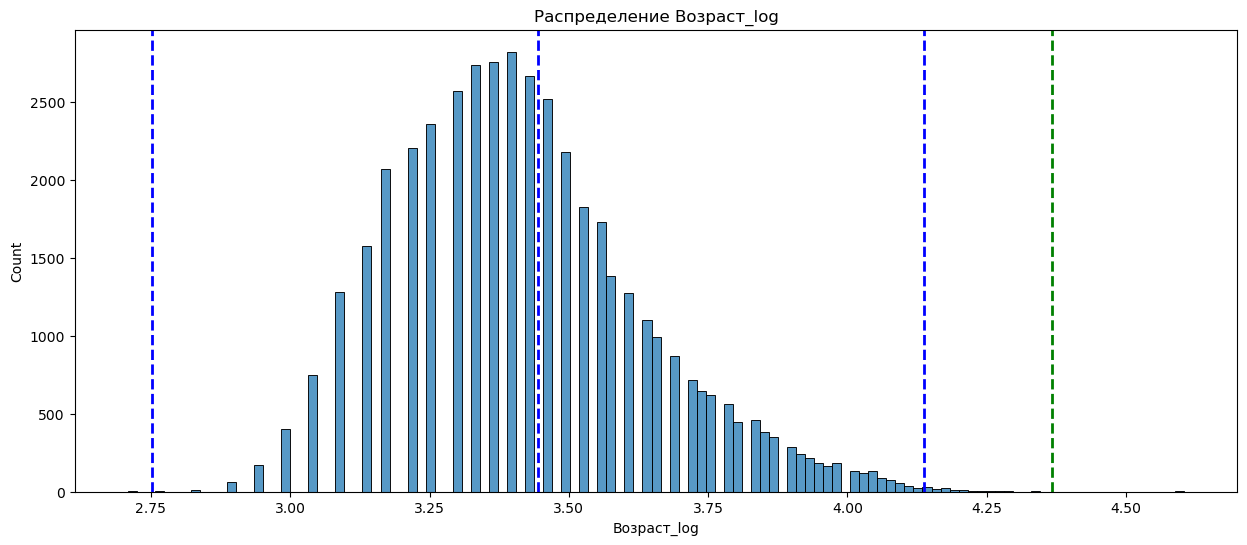

In [35]:
age_log = df['Возраст_log']
mu = age_log.mean()
sigma = age_log.std()
lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma
upper_bound_2 = mu + 4 * sigma

# draw the plot
fig, axes = plt.subplots(figsize=(15, 6))
histplot = sns.histplot(age_log)
histplot.axvline(mu, color='b', ls='--', lw=2)
histplot.axvline(lower_bound, color='b', ls='--', lw=2)
histplot.axvline(upper_bound, color='b', ls='--', lw=2)
histplot.axvline(upper_bound_2, color='g', ls='--', lw=2)
histplot.set_title('Распределение Возраст_log');

Найдем выбросы с помощью метода z-отклонения и удалим их.

In [36]:
# вспомогательная функция поиска выбросов методом z-отклонений
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned



age_outliers, df = outliers_z_score_mod(df, 'Возраст', log_scale=True, right=4)

# Выведем таблицу с полученными выбросами и оценим, с каким возрастом соискатели попадают под категорию выбросов.
display(age_outliers)

# Оценим минимальный и максимальный возраст в очищенном от выбросов датасете
print(f"Возраст min: {df['Возраст'].min()}")
print(f"Возраст max: {df['Возраст'].max()}")

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,полная занятость,волонтерство,частичная занятость,стажировка,проектная работа,удаленная работа,полный день,сменный график,гибкий график,вахтовый метод,ЗП (руб),Опыт работы (года),Возраст_log
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,False,False,False,False,True,False,False,True,False,True,True,False,10000.0,0.0,2.70805
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,False,False,True,False,False,False,False,False,True,False,False,False,2000.0,0.0,2.70805
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,False,True,True,False,True,True,True,True,True,False,True,False,60000.0,2.0,4.60517


Возраст min: 16
Возраст max: 77


**Выводы по признаку Возраст**  
- С помощью метода z-отклонений мы нашли 3 выброса, которыми являются записи с возрастом 15, 15 и 100 лет. Хотя в 15 лет подросток может иметь 2 и более месяцев опыта, например подрабатывая в фотосалоне или копировальном центре, где возможна работа по гибкому график. А для 100 лет опыт работы в 30 месяцев слишком мал и его действительно стоит рассматривать как выброс, в тмо числе стоит задаться логичным вопросом "Кто в 100 лет размещает резюме для поиска вакансий?"
- В очищенном от выбросов датасете находятся записи в интервале от 16 до 77 лет включельно.

## 5. Заключение  
[❎ **К ОГЛАВЛЕНИЮ**](#Этапы-работы-над-проектом)

Первый data science проект завершен, в рамках которого на практике были выполнены основные этапы работы с данными на примере датасета о резюме, а именно:  
- чтение данных с файлов формата csv.  
- предобработка данных, в том числе обработка дат
- исследовательский аналих данных  
- Обработка пропусков данных  
- очистка данных от выбросов